# Work Overview
### > Data Analysis (EDA) + Relationship of features
### > Data Preprocessing
### > Train Test Split & Predictive Modeling (Regression) 
### > Model Evaluation (RMSE,R2-Score,SMAPE)

In [1]:
# Libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/diamonds-characteristics-and-pricing-analysis/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [3]:
df.shape

(53940, 10)

## Checking Null Values

In [4]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

## Numerical Features Description

In [5]:
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


# EDA

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64


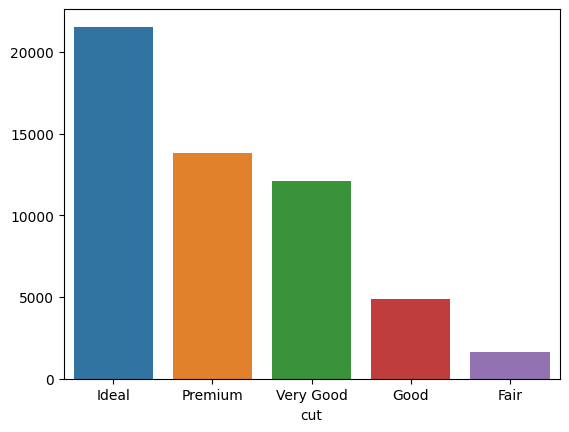

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64


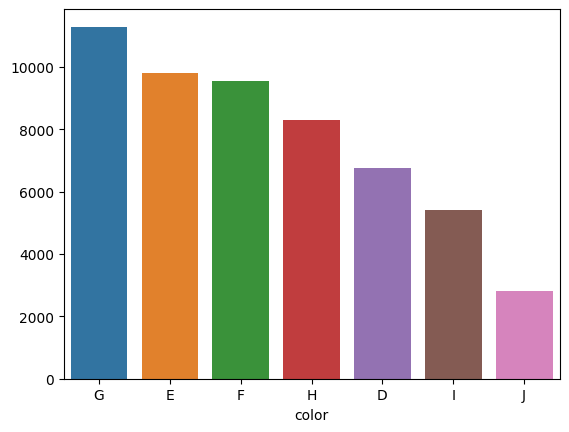

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


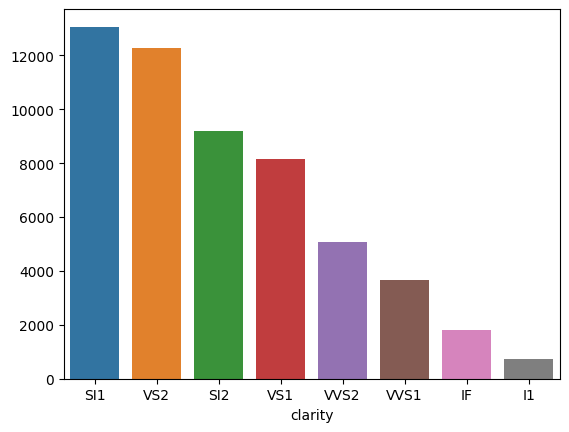

In [6]:
val=['cut','color','clarity']
for i in val:
    x=df[i].value_counts()
    print(x)
    sns.barplot(x=x.index,y=x.values)
    plt.show()

## Observation 
### > Features **cut,color,clarity** are ordinal in nature good for prediction 

>## Correlation of numerical features

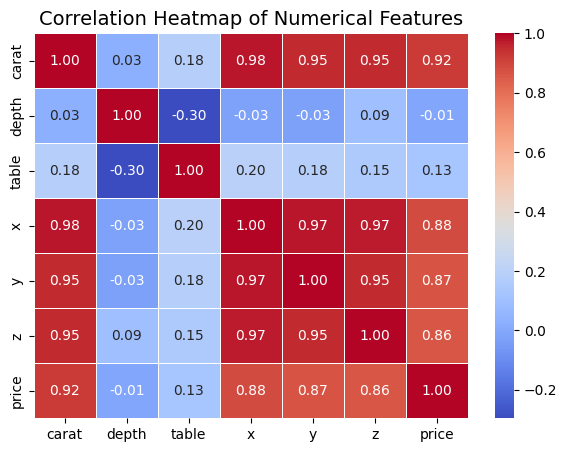

In [7]:
arr=['carat','depth','table','x','y','z','price']
corr_matrix = df[arr].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()

### > Features **carat,x,y,z** are highly correlated and **table** is slightly correlated with target variable i.e.price
### > This is a good indicator for creating predictive model

In [8]:
# Ordinal Mapping 
cut_mapping = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
color_mapping = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
clarity_mapping = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

df['cut'] = df['cut'].map(cut_mapping)
df['color'] = df['color'].map(color_mapping)
df['clarity'] = df['clarity'].map(clarity_mapping)

In [9]:
df.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,5,6,2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,4,6,3,59.8,61.0,3.89,3.84,2.31,326
2,0.23,2,6,5,56.9,65.0,4.05,4.07,2.31,327
3,0.29,4,2,4,62.4,58.0,4.20,4.23,2.63,334
4,0.31,2,1,2,63.3,58.0,4.34,4.35,2.75,335
5,0.24,3,1,6,62.8,57.0,3.94,3.96,2.48,336
6,0.24,3,2,7,62.3,57.0,3.95,3.98,2.47,336
7,0.26,3,3,3,61.9,55.0,4.07,4.11,2.53,337
8,0.22,1,6,4,65.1,61.0,3.87,3.78,2.49,337
9,0.23,3,3,5,59.4,61.0,4.00,4.05,2.39,338


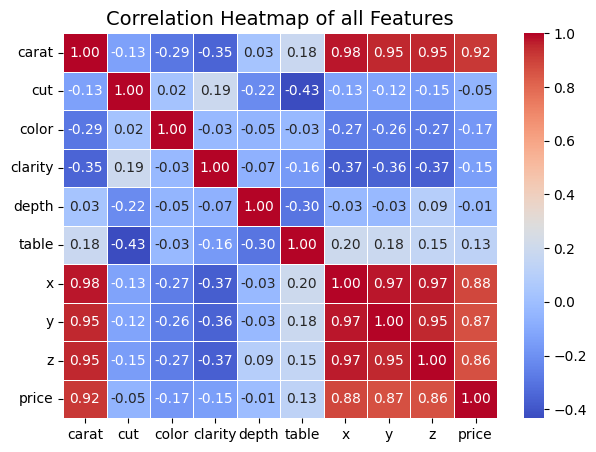

In [10]:
corr_matrix = df.corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of all Features', fontsize=14)
plt.show()

## Outlier Detection

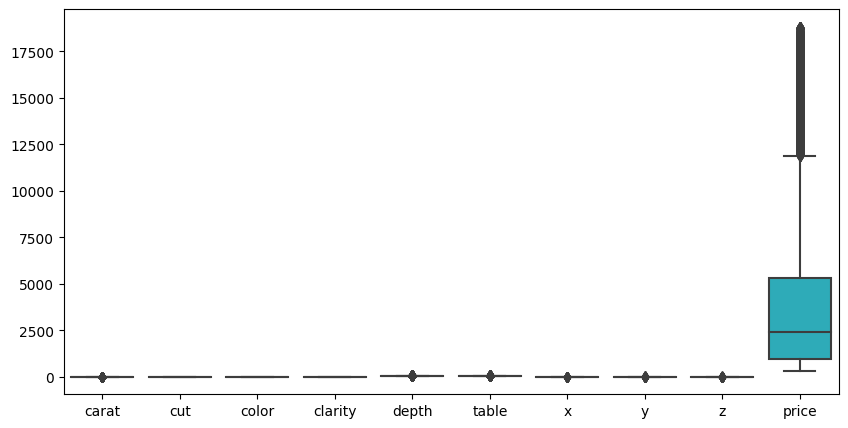

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(df)
plt.show()

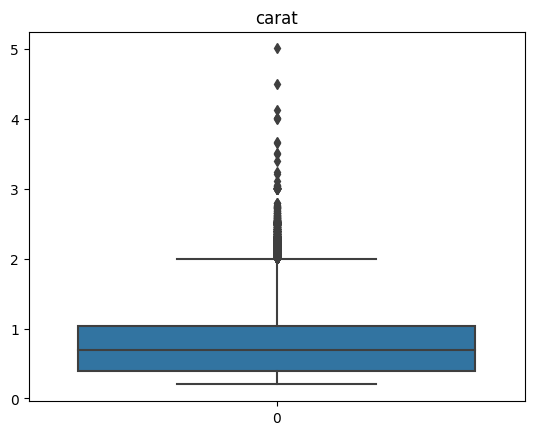

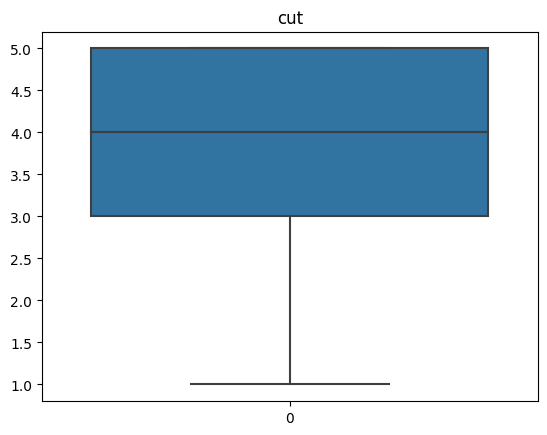

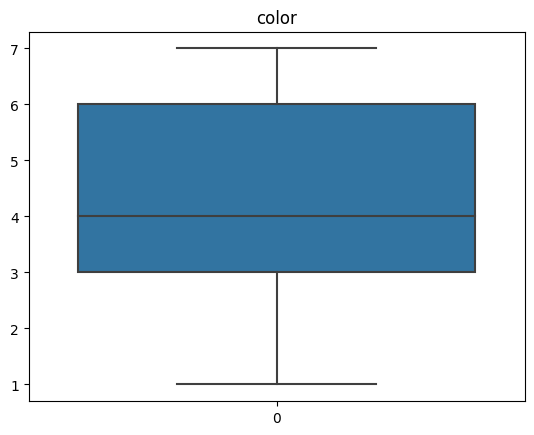

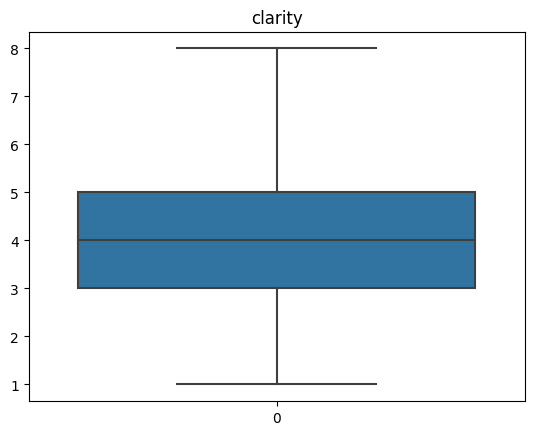

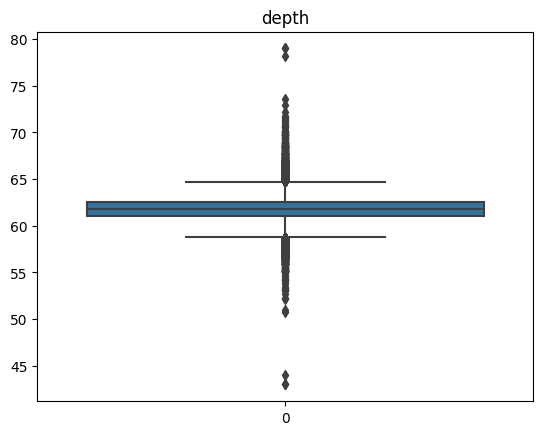

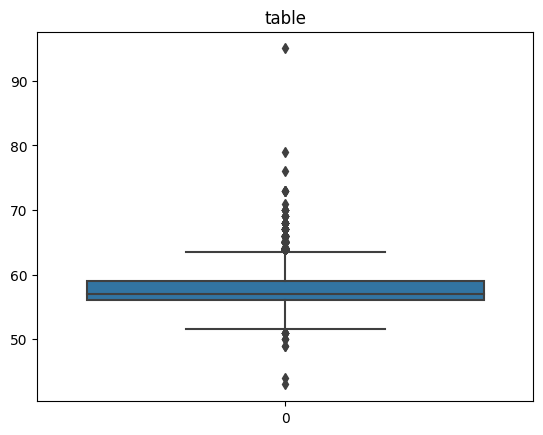

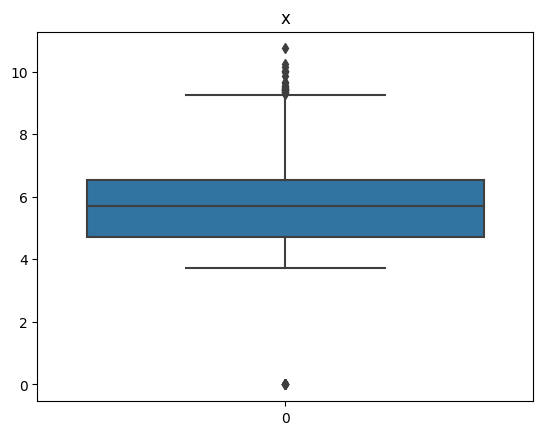

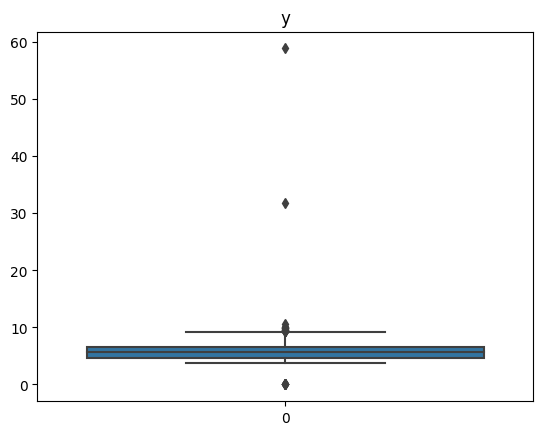

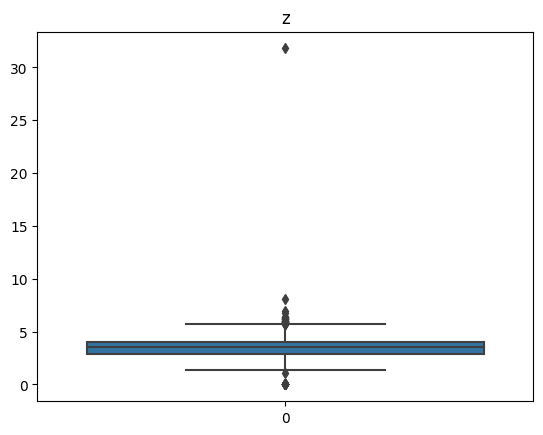

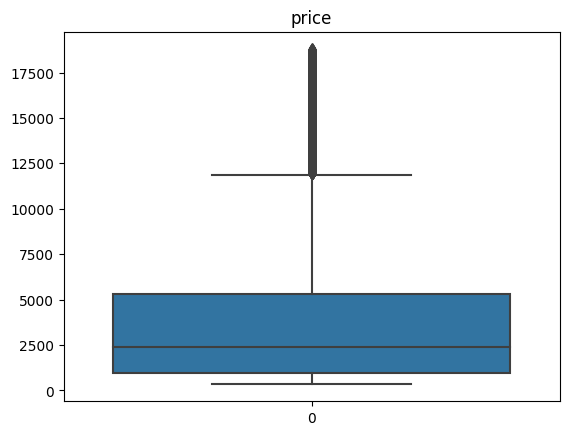

In [12]:
for i in df:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

### > **Outliers exist in multiple columns however, the higher values in the price column should not be treated as outliers because they reflect valid high-price items rather than erroneous entries.**

In [13]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

for col in ['price','carat','x','y','z','depth','table']:
    df = remove_outliers(df, col)

In [14]:
df.shape

(47091, 10)

<Axes: >

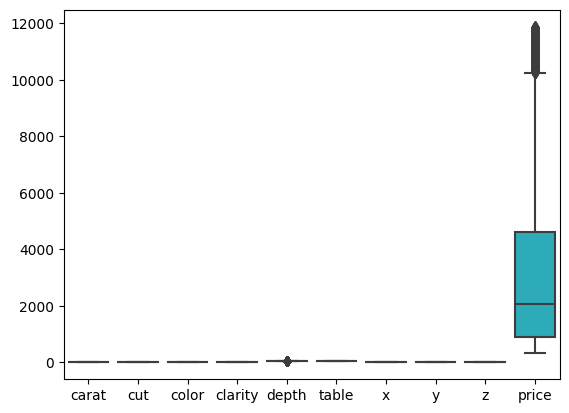

In [15]:
sns.boxplot(df)

# Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predictive Modeling

In [17]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model = XGBRegressor(
    n_estimators=700,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=0.8,
    reg_alpha=1,       
    reg_lambda=1,
    random_state=42
)
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)

y_train_log = np.log1p(y_train)
model.fit(X_train, y_train_log)
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 340.5146048047039


## Note : Before Log Transformation 
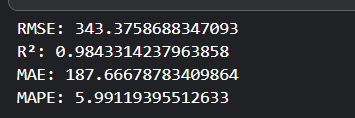
### > A log transformation was applied to address the right-skewed distribution of the price variable. This transformation compresses the scale of high values, reduces the influence of extreme observations, and makes the data closer to a normal distribution, enabling the regression model to learn patterns more effectively.
### > Hence, enabling good results.

In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
MAPE = (abs((y_test - y_pred) / y_test).mean()) * 100
print("RMSE:", RMSE)
print("R²:", r2_score(y_test, y_pred))
print("MAE:", MAE)
print("MAPE:", MAPE)

RMSE: 340.5146048047039
R²: 0.9845914603975507
MAE: 185.89917251063653
MAPE: 5.677230287726099


In [19]:
def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))) * 100

smape_value = smape(y_test, y_pred)
print("SMAPE:", smape_value)


SMAPE: 5.632666881830714


# Performance Visualization

Text(0.5, 1.0, 'Actual vs Predicted')

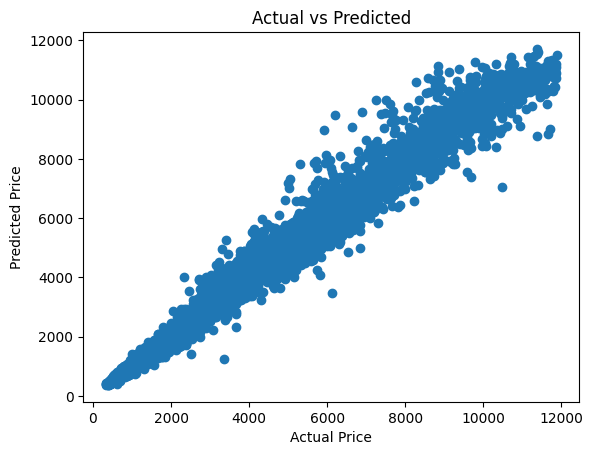

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")

## The scatter plot comparing actual and predicted prices illustrates the goodness of fit of the model.The high concentration of points near the 45-degree diagonal line signifies reliable prediction capability and high generalization performance.Only sparse dispersions are observed at the extremes, which is expected in datasets with wide price ranges.

# Final Evaluation
## > **The model exhibits excellent performance, with high R² and low RMSE/MAE/MAPE/SMAPE values, and the predicted values closely follow the actual values across all price ranges. These results indicate strong generalization capability, making the model suitable for deployment in real-world scenarios.**

Text(0.5, 1.0, 'Regression Plot')

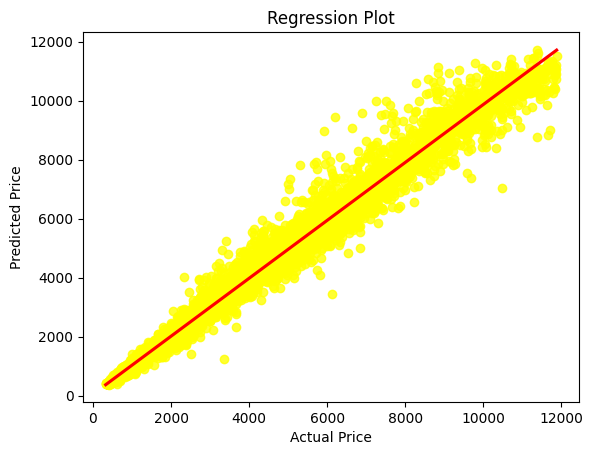

In [21]:
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'Yellow'}, line_kws={'color': 'red'})
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Regression Plot")

In [22]:
# Saving the Model 
import joblib

joblib.dump(model, "diamond_price_model.pkl")

['diamond_price_model.pkl']